# Contents
### Section 1. [Text of the blogpost](#blogpost-text)
### section 2. [Python code supporting the blog post](#python-code)

The HTML for this notebook can be found at https://robhendrik.github.io/Guessing-game-with-superphotons-A-Python-simulation/

For the Jupyter notebook check: https://github.com/robhendrik/Guessing-game-with-superphotons-A-Python-simulation

<a id="blogpost-text"></a>

# Guessing game with superphotons: a Python simulation 
Quantum non-locality is the effect that there can be a strong correlation between events at distant locations. Scientists have performed experiments where they observe these correlations and can exclude any communication or otherwise shared information that causes them. The correlations exist because Nature is fundamentally non-local.

In the 1980s, Boris Tsirelson demonstrated that non-locality in quantum mechanics has an upper bound [1]. Tsirelson based his argument on quantum mechanics' mathematical formalism. Scientists wondered whether there was a high-level principle explaining this upper limit, which is called the 'Tsirelson bound.'

In 1994, Sandu Popescu and Daniel Rohrlich presented their work on 'superphotons' [2] (see also our earlier post). These photons behave like ordinary photons except for their entanglement properties. For two entangled photons, the angle between the polarization directions determines the likelihood of their detection. If we measure one photon in polarization direction α and the second in polarization direction β, the probability of detecting the photons is cos(α-β)². Popescu and Rohrlich proposed (as a thought experiment) to change this relation such that the probability would be 1 if the difference between α and β is smaller than 22.5ᵒ and 0 if the difference is larger than 67,5ᵒ. They demonstrated that these photons exhibit non-locality beyond the Tsirelson bound but do not violate any other physical principle. Specifically, they concluded that these photons are fully compatible with Einstein's relativity theory because no actual information is transmitted faster than the speed of light. 

So, after the work of Tsirelson and the analysis by Popescu and Rohrlich, we are left with the situation that we can calculate that there is an upper limit to quantum non-locality, but we cannot truly understand it. If the difference between an ordinary photon and a 'super photon' is so tiny, and if these super photons are fully compatible with any known physical principle, why would these 'super photons' not exist? What would be the higher-level principle from which we can derive the Tsirelson bound?

## Guessing game
In the 1990s, Marcin Pawłowski and co-workers introduced a guessing game [3]. In this game, we have two players (Alice and Bob). Alice has some information (it can be a CD with music or a few movies on a hard drive). It is Bob's task to guess this information. The success rate in the game is the percentage of cases where Bob can guess successfully. Alice is only allowed to communicate a certain amount of information to Bob. Bob's chance of guessing correctly will grow if Alice is allowed to share more information with Bob.

To model the game, we represent Alice's information as a string of bits. Let's assume she has a string of 8 (random) bits, like '10010110' or '00110011'. Bob will get the task of guessing the value of one specific bit in Alice's bitstring. For instance, we ask Bob to guess the first or third bit. Bob's success rate would be 50% if Alice would not share any information. If Alice would share 8 bits, Bob's success rate would be 100% (because he would know the value of Alice's bits completely).

In Figure 1 below, we show the maximum allowed success rate for Bob in the situation that Alice has a bitstring of length n=4 or n=8 for different values of m (m is the amount of classical bits shared representing the amount of communication). Bob's success increases from 50% if he does not receive any information to 100% if he receives the total amount of information representing Alice's bitstring. These success rates represent the highest probability 'allowed' in information theory, given the amount of information shared between Alice and Bob. If Bob and Alice have a flawed algorithm or make mistakes, their success rate will be lower. The figure is the maximum they can obtain.

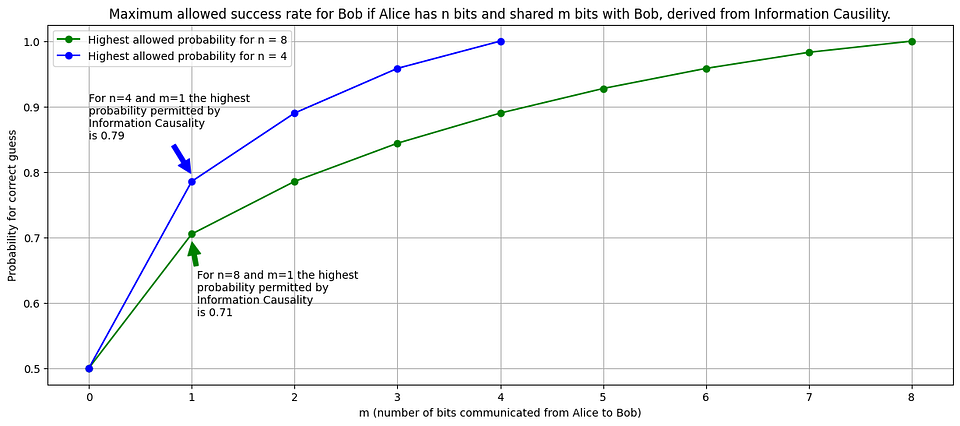

_Figure 1. Highest success rate for Bob allowed by Information Theory._

In the next step, Alice and Bob are allowed to share entangled (super)photons. We ensure these do not contain any information on Alice's bit string (for instance, we generate and distribute the photons before Alice's bit string is known). So, the entangled photons are not a communication channel by themselves. The argument from information theory where Bob's success rate is limited by the amount of information shared still holds. So, we should not see any success rate above the green (for n = 8) or blue (for n = 4) curves in Figure 1, even if Alice and Bob share entangled photons. If we had higher probabilities, something unnatural would have happened, as Bob would have had more information available than had been shared with him.

We use Python to implement the algorithm proposed by Pawłowski, see GitHub for the Jupyter Notebook. As basis we use the package FockStateCircuit. This package is designed to model quantum optical systems and is ideally suited for this experiment. This package offers the feature to work with 'superphotons'. We used this in an earlier post where we introduced the Popescu-Rohrlich photons. We can set the entanglement behavior of these photons by a 'quantumness parameter.' If this parameter, q, is 1, the photons are regularly entangled (i.e., in practice, we could experiment with real photons). If the quantumness increases, the entanglement properties change. In the limit of the q-value going to infinity, the photons will behave as proposed by Popescu and Rohrlich in their seminal paper. This quantumness parameter can scale from ordinary entanglement to the strongest conceivable superentanglement.

In Pawłowski's algorithm, Alice performs a series of measurements on the photons at her side. If Alice has a bitstring of length 8, we need seven pairs of entangled photons (where for each pair, one photon is with Alice and one with Bob).

## Algorithm at Alice's side
Based on the values in her bitstring, Alice has to perform a series of measurements on the photons at her side. The algorithm is iterative; she first measures four photons and does some calculations. Then Alice repeats the process with two photons and finally once more with one photon. For each iteration, she generates a new bitstring that is half the size of the original. After the last iteration, Alice has one bit left. This bit she communicates to Bob. So Alice measures seven photons to generate one bit of classical information. Note that for Alice, the value of this bit appears random. Even if she starts with the same bitstring, she has a 50% chance of generating a '1' as the final bit and a 50% chance of generating a '0'.

## Algorithm at Bob's side
Bob, at his side, also measures the photons. His measurement strategy depends on the 'index' of the bit he has to guess. Bob stores the measurement results and combines them with the bit received from Alice. From this combination, he generates his 'guess.'

The Python code belonging to the current post (in a Jupyter Notebook on GitHub) describes the algorithm. No complex mathematics is involved, so anyone interested can easily explore and play with this. For this post, we will not go deeper into the algorithm but refer the reader to GitHub.

## The circuit
Figure 2 shows our circuit when Alice has a bitstring of length n = 4. The circuit has three 'stations': One for Alice, one for Bob, and one for Charlie as an independent referee. Charlie generates the assignment for Alice and Bob and judges whether Bob has guessed correctly.

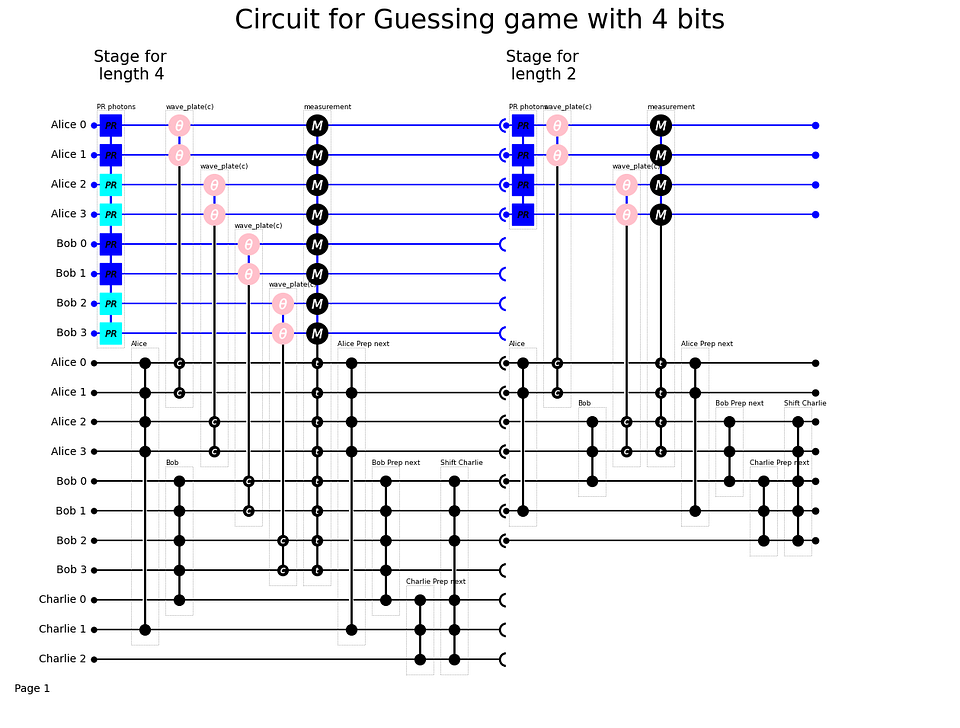

_Figure 2. Circuit for guessing game with n=4_

Now, we execute the algorithm with regular photons. We set the quantumness parameter to one (for q = 1, the photons have ordinary entanglement)._

```
# see GitHub for full code
# https://github.com/robhendrik/SuperPhotonGuessingGame
quantumness=1
bit_string_length = 8

# first generate the circuit
circuit_list = []
bit_string_length_counter = bit_string_length
while bit_string_length_counter > 1:
    circuit =   generate_circuit_for_stage_in_guessing_game(length_of_bitstring=bit_string_length_counter ,quantumness=quantumness)
    circuit_list.append(circuit)
    bit_string_length_counter = bit_string_length_counter //2
compound_circuit = fsc.CompoundFockStateCircuit(list_of_circuits=circuit_list)

# prepare the input state
initial_collection = fsc.CollectionOfStates(fock_state_circuit=circuit_list[0], input_collection_as_a_dict=dict([]))
charlies_number = np.random.randint(0,2**bit_string_length)
bobs_index = np.random.randint(bit_string_length)     
alices_bit_list = number_to_bit_list(charlies_number,bit_string_length)
state = fsc.State(initial_collection)
state.initial_state = str(iteration) + "Expected: " + str(alices_bit_list[bobs_index])
state.classical_channel_values[-3] = bobs_index
state.classical_channel_values[-2] = charlies_number
state.cumulative_probability = 1
initial_collection.add_state(state)

# run the circuit
resulting_collection = compound_circuit.evaluate_circuit(initial_collection)

# to determine success rate we check per state if the last character of the initial_state is '0' or '1' (the initial state
# is the 'Expected: 0' or 'Expected: 1'.). This character we compare to the value in last classical channel (Charlies 3rd channel).
# This channel should contain Bob's guess. If the guess is the same as indicated in the initial_state we add the probability for this
# state to the variable correct, otherwise to the variable fault
fault = 0
correct = 0
for state in resulting_collection:
    guess = state.classical_channel_values[-1]
    if str(guess) == state.initial_state[-1]:
        correct += state.cumulative_probability
    else:
        fault += state.cumulative_probability

# We can simulate the expected outcome. For each state the success rate should be 85%. We expect the correct answer if all stages deliver
# a correct result or if only one of the stages delivers a correct result (two stages with an incorrect result cancel eachother, so together
# they still come to a correct outcome!)
Psuccess = 0.5+0.5*np.cos(np.pi/4)
Pfail = 1-Psuccess
Ptotal = Psuccess**3 + Psuccess*Pfail*Pfail*3
print("Success rate expected for single stage: ", np.round(Psuccess,2), "Expected in total: ", np.round(Ptotal,2))

# Compare what we expect to what we find
print('For a quantumness value of 1 we expect a success rate of', np.round(Ptotal,2),' for the three stages combined')
print('From the simulation we find a value of: ', np.round(correct/(correct+fault),2))
```
```
Success rate single stage:  0.85 Expected in total:  0.68
For a quantumness value of 1 we expect a success rate of 0.68  for the three stages combined
From the simulation we find a value of:  0.68
```
If we run the experiment for q = 1, we see that Bob's success rate is 68%. This value is below the limit from Figure 1. Despite using entangled photons and this complex procedure, we cannot conclude that Bob's success rate is surprising. His success is fully compatible with the fact that Alice has sent him one bit of information; from an information theoretical perspective, they could even do a little bit better.

Now, let's run the experiment with 'superphotons'. We use quantumness parameters up to 20. Remember that for q=1, the photons behave as ordinary entangled photons, and for very high values, they behave as proposed by Popescu and Rohrlich. We see in Figure 3 that for values just above 1, Bob's success rate already exceeds what information theory allows. For the higher q-values, Bob's success rate even approaches 100%. This success depends on communicating just one bit of information, with the help of 'superentangled' photons, which do not carry any information on Alice's but string.

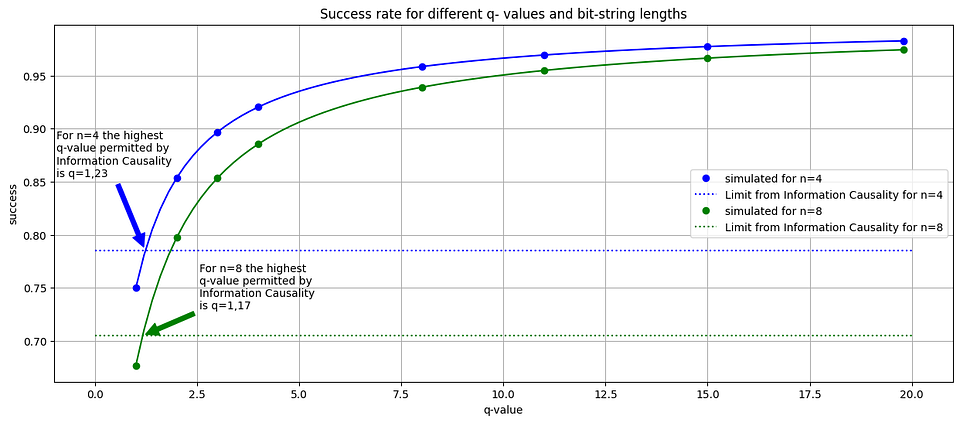

_Figure 3. With superphotons we find higher success rates for the guessing game than can be explained by the amount of communication. With these superphotons we can violate Information Causality._

## Information Causality

So, suppose we change the entanglement between the photons slightly by increasing the quantumness parameter. In that case, we already see that we can utilize the photons for communication beyond what information theory permits. We would violate a higher-level principle, as information cannot appear out of nowhere. Pawłowski named the principle that Bob cannot utilize more information than he received from Alice as 'Information Causality.' With Information Causility, we can explain why Nature limits non-locality in quantum mechanics to the Tsirelson bound since we can easily violate Information Causality with photons that break the Tsirelson bound.

When Alice has 4 or 8 bits, we can use photons with a quantumness value of just above one without violating Information Causality. So, we cannot derive exactly the Tsirelson bound (corresponding to a q-value of precisely one) for these situations. If we increase the bit string at Alice's side, we will see that the boundary will move closer to q = 1. So, we can define the Tsirelson bound as the level of quantum non-locality, which ensures that for an arbitrary large bit string at the side of Alice, the success rate for Bob will not exceed the maximum value allower from information theory.

## Conclusion
This conclusion is striking. When Tsirelson derived the value of 'his' bound in the 1980s, he utilized the highly mathematical formalism of quantum mechanics. We can derive this limit from the high-level principle of Information Causality. This triggers the question of whether other fundamental aspects of (quantum) physics also stem from information theory.

In the next post, we will discuss a recent development in a field where Marcin Pawłowski showed that we can also derive the Tsirelson bound by utilizing just one set of entangled (super)photons [5]. In the algorithm we discussed in the current post, we need infinite photon pairs to calculate the Tsirelson bound with high precision. In the next post, we will see that we can achieve the same result with just one photon pair. Until then, please leave your build and comments on this post.

---

[1] B. Tsirelson, "Quantum generalizations of Bell's inequality," Letters in Mathematical Physics 4, 93, (1980).

[2] S. Popescu, D. Rohrlich, "Quantum non-locality as an axiom," Found Phys 24, 379 (1994). https://doi.org/10.1007/BF02058098

[3] M. Pawłowski, T. Paterek, D. Kaszlikowski, V. Scarani , A. Winter and M. Zukowski, "Information causality as a physical principle," Nature 461, 1101 (2009). https://doi.org/10.1038/nature08400

[4] The code used for this post can found on GitHub in a Jupyter Notebook (https://github.com/robhendrik/SuperPhotonGuessingGame) or HTML format (https://robhendrik.github.io/SuperPhotonGuessingGame)

[5] N. Miklin and M. Pawłowski, "Information Causality without Concatenation," Phys. Rev. Lett. 126, 220403 (2021). https://doi.org/10.48550/arXiv.2101.12710



<a id="python-code"></a>

# Python code supporting the blog post
### a. [Imports](#imports)
### b. [Functions](#functions)
### c. [Guessing game circuit](#circuit)
### d. [Testing the circuit for q=1 and q=1000](#test)
### e. [Generate the curves belonging to the blogpost](#curves)

<a id="imports"></a>
## Imports



In [32]:
# Generic imports
import importlib
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines
import matplotlib.colors

In [33]:
# Install the package via: pip install FockStateCircuit
import fock_state_circuit as fsc

(1/2)*np.sqrt(2)

0.7071067811865476

<a id="functions"></a>
## Functions
### Helper functions

Below the definitions and conventions used in the code. Noting this down requires some boring book-keeping but avoids confusion.
1. The bit string for Alice is generated from a random integer provided by Charlie. We use the least significant bit at index 0 of the bit-string. We also fill with zero's to get to the required bit string length. So the number 1 for a bit string length of 4 would be [1,0,0,0]. Number 5 for a string length of 4 would be [1,0,1,0]. Note that if you for instance use the Python function `bin` or `format` to generate the bitstring you get the 'reverse' string. `bin(5)` will return `0b101` and `{0:04b}'.format(5)` will return `0101`.

2. For binary entropy we use the function $ H_{b}(p) = -p \log_{2}(p) - (1-p)\log_{2}(1-p) $. For any probability ($p$) this gives a unique value for $ H_{B} $. If we calculate the reverse (so calculate the probability that belongs to a certain value of binary entropy) we can have two solution. For every value of $H_{B}$ we can have a probability between 0 and 0.5 and a value between 0.5 and 0. In our code we generate the higher probability. If you need both values you can easily implement, but it will not be generated automatically.

3. There are different ways to quantify 'superentanglement'. In our code we differentiate between 'no-signalling boxes' and 'Popescu-Rohrlich photon pairs'. We use 'no-signalling boxes' for objects like cardboard boxes, banana's (see Jeff Bubs Bananaworld) or any other object that allows two distinct measurements. For Popescu-Rohrlich photons we have 'real' photons that we can measure in any polarization direction and send through all kinds of (linear) optical components like beamsplitters. So the 'no-signalling boxes' and 'Popescu-Rohrlich photon pairs' are related in the sense that the can show superentanglement, but are not the same.

    * For '__no-signalling boxes__' we use the __k-value__ to quanty their behavior. The convention is that if use boxes with a give K-value to meausre CHSH correlation then we find a correlation of the same value (so CHSH correlation = K). This means K can vary from 0 to 4. Up to $K=2$ we can explain the behaviour by classical theory, up to $ K = 2\sqrt{2}$ we van explain the boxes with quantum theory and above $K = 2\sqrt{2}$ to a value the boxes show behavior not permitted in quantum physics and we have to assume 'superentanglement'.
    * We can relate the probability for a pair of no-signalling boxes to give a correct result to the K-value. That relationship is

    $$
    p = \frac{1}{2}(1+\frac{K}{4}) 
    $$
    $$
    K = 4(2p-1)
    $$

    * We see that for $p=0.5$ the k-value is 0. The boxes generate randomly an outcome of 1 or 0 and there is no correlation. So the CHSH correlation would also be 0. For 'perfect' boxes the probability is 1, and the k-value is 4. These boxes show the maximum level of 'superentanglement'. We know that the highest value for $K$ allowed in quantum mechanics is $2\sqrt{2}$. This corresponds to a probability of $\frac{1}{2}(1+\frac{1}{2}\sqrt{2})$ which is roughly 85%. So quantum mechanics allows no-signalling boxes which give the 'correct' result in 85% of the measurements.

    * For 'ordinary' photons we can write the probability to detect the second photon in polarization orientation $\beta$ after we detected the first photon in polarization direction $\alpha$ as $P(β|α) = cos(α-β)²$. Here $P(..|..)$ denotes the conditional probability. We can use basic trigonometry to write the same probability as $P(β|α) = \frac{1}{2}(1+\cos(2(α-β))$ (remember from high school: $cos(2x) = cos(x)^{2}-sin(x)^2 = 2cos(x)^2-1$).

    * If we use photons to measure the CHSH correlation (as was done by Alain Aspect in his Nobel-prize winning experiment) we can relate the probability to the correlation. The correlation ($C(α-β)$) is the probability to detect them in the same polarization, minus the probability to NOT detect them in the same orientation. So the correlation is $C(α-β) = 1\cdot P(β|α) -1\cdot(1-P(β|α)) = 2P(β|α) -1$. 

    * We can relate the photon probabilities and correlations with 'no-signalling-boxes' for a specific experiment. This is the Alain Aspect/EPR experiment where we detect photons such that $(α-β)$ is $22.5^{o}$ or $67.5^{o}$, such that  $P(β|α) = \frac{1}{2}(1+\frac{1}{2}\sqrt{2})$ or $P(β|α) = \frac{1}{2}(1-\frac{1}{2}\sqrt{2})$. The correlations betweem measurement of the two photons is then $\frac{1}{2}\sqrt{2}$ for $(α-β) = 22.5^{o}$ or $-\frac{1}{2}\sqrt{2}$ for $(α-β) = 67.5^{o}$. In the CHSH correlation these results are combines such that CHSH = ${2}\sqrt{2}$. We can write $P_{22.5^{o}}$ for the probability to detect the second photon at a polarization orientation which is $22.5^{o}$ from the polarization direction of the first photon. The relation between the CHSH correlation an this probability is given by $CHSH = 8P_{22.5^{o}} - 4$. We summarize the different metrics for photons, for the detection setup used to measure the CHSH correlation.
    $$
    P(β|α) = P_{22.5^{o}} = \frac{1}{2}(1+\frac{1}{2}\sqrt{2}) \approx 85\% \\
    C(α-β) = 2P_{22.5^{o}} -1 = +\frac{1}{2}\sqrt{2} \approx 71\% \\
    CHSH = 8P_{22.5^{o}} - 4 = 2\sqrt{2} \approx 2.8
    $$

    * For '__popescu-rohrlich-photons__' the probability to detect both photons in the same polarization is determined by the angle between their Stokes vectors on the Poincare sphere. We use the __q-value__ to set the 'superentanglement' behavior of the popescu-rohrlich-photons. The q-value influences the probability $P(β|α)$, the correlation $C(α-β)$ and the CHSH correlation. We use $\pm\sqrt[q]{|x|}$ to denote that the higher-order root is taken as positive value when the value under the root is positive, and negative if teh value under the root is negative. So if $x$ is positive $\pm\sqrt[q]{|x|} = +\sqrt[q]{x}$ and if $x$ is negative $\pm\sqrt[q]{|x|} = -\sqrt[q]{|x|}$ 

    $$
    P(β|α) = \frac{1}{2}(1\pm\sqrt[q]{|\cos(2(α-β))|}) \\
    C(α-β) = \pm\sqrt[q]{|\cos(2(α-β))|} \\
    CHSH = 4 \sqrt[q]{\frac{1}{2}\sqrt{2}}
    $$ 

    * with this we can establish a relation between the k-value and the q-value for which the no-signalling boxed and popescu-rohrich photon pairs will generate the same CHSH correlation. For these k- and q-values the we have a similar level of 'superentanglement'.

    
    $$
    K = 4 \sqrt[q]{\frac{1}{2}\sqrt{2}} \\
    q = \frac{\log(\frac{1}{2}\sqrt{2})}{\log(\frac{K}{4})}
    $$ 
 


In [34]:
def number_to_bit_list(number, bit_string_length):
    """ Generate list of bits (as [1,0,0] with least significant bit first. So the reverse of a string notation). 
    This function can be used to translate generate Alice's bitstring from a random number provided to her by 
    Charlie """
    return [((number >> i) & 1) for i in range(bit_string_length)]

def bit_list_to_number(bit_list):
    """ Generate an integer from a list of bits. Least significant bit in list at index 0. This function is
    the reverse of number_to_bit_list(). """
    bit_string = "".join([str(n) for n in bit_list])[::-1]
    return int(bit_string,2)

def merge_two_lists_on_even_indices(list_1, list_2):
    """ Create a new list from two lists. New list has half size of the original lists. 
    If the two lists have equal value at even index new list is 0, else 1. The values
    at the odd indices are ignored.
    Example:
        list_1 = [1,0,1,0,1,0,1,0]
        list_2 = [1,0,0,0,0,0,1,0]
        outcome = [0,1,1,0]
    """
    return [int(value_1 != value_2) for index, (value_1, value_2) in enumerate(zip(list_1,list_2)) if index%2 ==0]
    
def length_of_bitstring(number):
    """ Function to calculate the bit string length for guessing a specific number. The guessing game algorithm
    works for bit strings that are a power of 2 (so n = 2,4,8,16,..). This function calculates the lowest value
    for n that can capture the input number."""
    length = int(np.ceil(np.log2(number+1)))
    n = int(2**int(np.ceil(np.log2(length))))
    return n

def binary_entropy(p):
    """ Calculate Shannon's binary entropy from a probability."""
    if p >= 1 or p <=0:
        return 0
    else:
        return -p*np.log2(p) - (1-p)*np.log2(1-p)
    
def binary_entropy_reverse(H, accuracy_in_digits: int = 8):
    """ Calculate the probability that belongs to a given value of the binary entropy. The probability will be between 0.5 and 1 (including boundaries)."""
    p_min = 0.5
    p_max = 1
    p_average = (p_max + p_min)/2
    while np.round(binary_entropy(p_average),accuracy_in_digits) != np.round(H,accuracy_in_digits):
        if np.round(binary_entropy(p_average),accuracy_in_digits+2) < H:
            p_max = p_average
            p_average = (p_max + p_min)/2
        else:
            p_min = p_average
            p_average = (p_max + p_min)/2
    return p_average

def quantumness_to_K(quantumness):
    """ Translate the q-value to a K-value. The q-value is the paramater for the Popescu-Rohrich photons and the K-value is the CHSH correlation
    we can achieve with these photons. """

    return 4*np.power((1/2)*np.sqrt(2),1/quantumness)

def K_to_quantumness(K):
    """ Translate the K-value to a q-value. The q-value is the paramater for the Popescu-Rohrich photons and the K-value is the CHSH correlation
    we can achieve with these photons. """

    return np.log((1/2)*np.sqrt(2))/np.log(K/4)


### Classical Channel functions
The total circuit contains the optical channels for Alice and Bob, as well as the classical channels for Alice, Bob and Charlie. In this section
we define the functions that work on the classical channels to manipulate the data. The size of the circuit is determined by the length of the original 
bit string (which we call n). The classical channels are allocated like:
* First n channels are for Alice
* Then we have n channels for Bob
* The last 3 channels are for Charlie
So, the circuit will have 2n+3 classical channels.

Initially Charlies channel contains the assigned for Alice and Bob. 
* Charlies first channel (Python index -3) contains the index of the bit Bob has to guess
* Charlies second channel (Python index -2) contains the integer number representing Alice's bit string. This is also where Alice will write in the last stage the
bit she wants to communicate to Bob.
* Charlies third channel (Python index -1) is where Bob can write his answer.

The circuit is executed in stages, where for each stage the length of the bitstring is halved. The last stage receives as input a bit string of length 2. We define the function for each stage such that it can be used iteratively. The output of stage can immediately be used as input for the next stage. 

As first step Alice's classical channels are loaded with the bit string generated from this integer. Alice will then analyse this bit string and determine her measurement strategy. This is executed by setting the orientation of half wave plates in the optical channels. This orientation determines the polarization direction used to measure the photons at Alice's side.

Bob's measurement strategy is based on the index of the bit he has to guess. Based on this value he will the orientation of half wave plates in the optical channels at his side.

After measurement Bob and Alice analyze the results at their side and prepare for the next iteration. Bob stores his result in Charlie's third channel. Alice generates a new integer for the next iteration (from this integer the next bit string will be generated). Alice stores this integere in Charlie's second channel. Finally Charlie updates his first channel with a new index (since the bit string length is reduced by half in the next iteration Charlie has to provide a new index).

The very last step for every stage in the circuit is to move the data in Charlies channel. Since Charlies data is always stored in the last three channels we have to move it in preparation for the next stage (if this stage is for bitstring length 4 Charlies channels are channels 9,10 and 11. The next stage will have bit string length 2, so the input needs to be moved to channel 5,6 and 7)

In [35]:
def determine_wave_plate_settings_for_alice(current_values, new_input_values, affected_channels):
        """ Current values will be all classical channels, new_input_values is not used. Affected_channels will be 
            a list with Alice's channels and Charlie's channel
            Example: If bit string length is 8, charlie's number for Alice is 11 and charlie's bit index for Bob is 2 then
            for this function input is 
                current_values = [0,0,0,0,0,0,0,0,b,b,b,b,b,b,b,b,2,11,0] (with b bob's channels)
                affected_channels = [0,1,2,3,4,5,6,7,17]
                return values = [pi,0,pi,pi/16,pi,0,pi,0,b,b,b,b,b,b,b,b,2,11,0]
        """
        # define the wave plate angles for the measurements
        S_alice = np.pi/8 # polarization double wave plate angle, so at 45 degrees
        T_alice = 0  # polarization double wave plate angle, so at 0 degrees
        S_bob = np.pi/16  # polarization double wave plate angle, so at 22.5 degrees
        T_bob = np.pi*(3/16) # polarization double wave plate angle, so at 67.5 degrees
        # for all combinations relative angle is 22.5 degrees, except TT which has relative angle of 67.5 degrees

        # determine the length of the bit string for this circuit
        length_of_bit_string = int((len(current_values)-3)/2)
        
        # Split the classical channel values so the processing is a bit more clear
        channels_for_alice = current_values[:length_of_bit_string]
        channels_for_bob = current_values[length_of_bit_string:-3]
        channels_for_charlie = current_values[-3:]
        
        # the second channel of Charlie contains the number representing Alice's bit string
        charlies_number = channels_for_charlie[1]
    
        # generate the bit string with least significant bit left
        alices_bit_list = number_to_bit_list(charlies_number, length_of_bit_string)
        
        # we now determine the settings for the wave plates for Alice
        # example: Charlie number is 11 and bit string length is 8. The bit string is 11010000
        # (remember LSB left). The first photon should be measured "S" since first
        # two bits are equal, the second photon should be measured "T"
        new_values = []
        previous_bit_value = None
        for index, this_bit_value in enumerate(alices_bit_list):
            if index%2 == 1:
                if previous_bit_value is not None and this_bit_value == previous_bit_value:
                    measurement = S_alice
                else:
                    measurement = T_alice
                channels_for_alice[index] = measurement
            else:
                channels_for_alice[index] = np.pi # it will be a half wave plate so phase shift is 180 degrees, or pi radians                    
            previous_bit_value = this_bit_value

        return channels_for_alice + channels_for_bob + channels_for_charlie

def determine_wave_plate_settings_for_bob(current_values, new_input_values, affected_channels):
        """ current values will be all classical channels, new_input_values is not used. Affected_channels will be 
            a list with Bob's channels and Charlie's channel
            Example: If bit string length is 8, charlie's number for Alice is 11 and charlie's bit index for bob is 2 then
            for this function input is 
                current_values = [a,a,a,a,a,a,a,a,0,0,0,0,0,0,0,0,2,11,0] (with a alice's channels)
                affected_channels = [8,9,10,11,12,13,14,15,16]
                return values = [a,a,a,a,a,a,a,a,pi,0,pi,0,pi,0,pi,0,2,11,0]
        """
        # define the wave plate angles for the measurements
        S_alice = np.pi/8 # polarization double wave plate angle, so at 45 degrees
        T_alice = 0  # polarization double wave plate angle, so at 0 degrees
        S_bob = np.pi/16  # polarization double wave plate angle, so at 22.5 degrees
        T_bob = np.pi*(3/16) # polarization double wave plate angle, so at 67.5 degrees
        # for all combinations relative angle is 22.5 degrees, except TT which has relative angle of 67.5 degrees

        # determine the length of the bit string for this circuit
        length_of_bit_string = int((len(current_values)-3)/2)
        
        # Split the classical channel values so the processing is a bit more clear
        channels_for_alice = current_values[:length_of_bit_string]
        channels_for_bob = current_values[length_of_bit_string:-3]
        channels_for_charlie = current_values[-3:]


        # the first channel of Charlie contains the number representing the index for which Bob has to guess the value
        charlies_bit_index = channels_for_charlie[0]
        pair, position = divmod(charlies_bit_index,2)
        if position == 0:
            measurement = S_bob
        else:
            measurement = T_bob

        # we now determine the settings for the wave plates for Bob
        # if the index is even, measurement should be "S" and if the index is odd measurement shoudl be "T"
        new_values = []
        for index in range(len(channels_for_bob)):
            if index%2 == 0:
                channels_for_bob[index] = np.pi # it will be a half wave plate so phase shift is 180 degrees, or pi radians
            else:
                channels_for_bob[index] = measurement

        return channels_for_alice + channels_for_bob + channels_for_charlie
 
def prepare_for_next_stage_Alice(current_values, new_input_values, affected_channels):
    """ Alice assesses the measurement results at her side to generate a new integer, as basis for generating
        the new bit string for the next stage. If this is the last stage Alice generates the single bit she 
        communicated to Bob. The new integer is stored in Charlies second channel.
    """
    # determine the length of the bit string for this circuit
    length_of_bit_string = int((len(current_values)-3)/2)
    
    # Split the classical channel values so the processing is a bit more clear
    channels_for_alice = current_values[:length_of_bit_string]
    channels_for_bob = current_values[length_of_bit_string:-3]
    channels_for_charlie = current_values[-3:]

    # Alice's results are stored in the first even classical channels
    # the algorith is that if for each measurement the outcome is the same as the first bit in the pair we store 0, else we store 1
    # first regenerate the bit string from the number as input to this stage
    charlies_input_number = channels_for_charlie[1]
    input_bit_list = number_to_bit_list(charlies_input_number, length_of_bit_string)
    channels_for_charlie[1] = bit_list_to_number(merge_two_lists_on_even_indices(channels_for_alice,input_bit_list))

    return channels_for_alice + channels_for_bob + channels_for_charlie

def prepare_for_next_stage_Bob(current_values, new_input_values, affected_channels):
    """ Bob assess the measurement results at his side and stores the result in Charlies third channel.
    """
    # determine the length of the bit string for this circuit
    length_of_bit_string = int((len(current_values)-3)/2)
    
    # Split the classical channel values so the processing is a bit more clear
    channels_for_alice = current_values[:length_of_bit_string]
    channels_for_bob = current_values[length_of_bit_string:-3]
    channels_for_charlie = current_values[-3:]

    # the bit index for Bob has to be adjusted for bit_string that is half the size
    charlies_bit_index = channels_for_charlie[0]
    pair, position = divmod(charlies_bit_index,2)

    # read the measurement from Bob and add that to the number in measurement result
    bobs_measurement_result = channels_for_bob[pair*2]
    channels_for_charlie[2] += bobs_measurement_result

    if length_of_bit_string == 2: #this was the last stage, we have to generate Bob's guess
        bit_value_that_alice_will_communicate_to_bob = channels_for_charlie[1]
        bobs_results_so_far = channels_for_charlie[2]
        bobs_guess = (bit_value_that_alice_will_communicate_to_bob + bobs_results_so_far)%2
        channels_for_charlie[2] = bobs_guess

    return channels_for_alice + channels_for_bob + channels_for_charlie

def prepare_for_next_stage_Charlie(current_values, new_input_values, affected_channels):
    """ Charlie prepares for the next stage by generating a new bit index for Bob. """
    # determine the length of the bit string for this circuit
    length_of_bit_string = int((len(current_values)-3)/2)
    
    # Split the classical channel values so the processing is a bit more clear
    channels_for_alice = current_values[:length_of_bit_string]
    channels_for_bob = current_values[length_of_bit_string:-3]
    channels_for_charlie = current_values[-3:]

    # the bit index for Bob has to be adjusted for bit_string that is half the size
    charlies_bit_index = channels_for_charlie[0]
    pair, position = divmod(charlies_bit_index,2)

    # the bit index for Bob has to be adjusted for bit_string that is half the size
    channels_for_charlie[0] = pair

    return channels_for_alice + channels_for_bob + channels_for_charlie

def shift_charlies_channels_to_place_for_next_stage(current_values, new_input_values, affected_channels):
    """ Charlie's channels are shifted to be in the right place for the next iteration (except when 
    this is the last stage, then we do nothing). """
    # if this was last stage do nothing
    if len(current_values) == 2 + 2 + 3:
        return current_values
    else:
        old_length = len(current_values) - 3
        new_length = old_length // 2
        for index, value in enumerate(current_values[-3:]):
            current_values[new_length+index] = value

    return current_values


<a id="circuit"></a>

## Function to create one stage of the circuit. 
This function will be called for every stage, each time with the bit string length reduced by a factor 2

In [36]:

def generate_circuit_for_stage_in_guessing_game(length_of_bitstring, quantumness):

    # the actual length of the bitstring has to be a power of 2. Round up to the nearest power of 2
    actual_length = 2**int(np.ceil(np.log2(length_of_bitstring)))

    # we need one photon pair per 2 bits (so Alice has one photon per 2 bits at her side. Same for Bob)
    number_of_photon_pairs = length_of_bitstring//2

    # define the PR photon pairs
    popescu_rohrlich_correlations = [
        {'channels_Ah_Av_Bh_Bv':[n*2,n*2+1,number_of_photon_pairs*2 + n*2,number_of_photon_pairs*2 + n*2 + 1],
         'quantumness_indicator':quantumness} for n in range(number_of_photon_pairs)
         ]

    # make lists to easily identify the channel numbers Bob, Alice and Charlie
    optical_channels_for_alice = []
    for box in popescu_rohrlich_correlations:
        optical_channels_for_alice.append(box['channels_Ah_Av_Bh_Bv'][0])
        optical_channels_for_alice.append(box['channels_Ah_Av_Bh_Bv'][1])

    optical_channels_for_bob = []
    for box in popescu_rohrlich_correlations:
        optical_channels_for_bob.append(box['channels_Ah_Av_Bh_Bv'][2])
        optical_channels_for_bob.append(box['channels_Ah_Av_Bh_Bv'][3])

    # two channels per photon pair are needed for both Alice and Bob (they need one wave plate for each photon at their side, and need
    # two classical channels to control that waveplate)
    classical_channels_for_alice = [index for index in range(2*len(popescu_rohrlich_correlations))] # one channel to measure each box
    classical_channels_for_bob = [(1+ max(classical_channels_for_alice)+ index) for index in range(2*len(popescu_rohrlich_correlations))]
    classical_channels_for_charlie = [2*length_of_bitstring + index for index in range(3)]

    # we then add two classical channels for 'Charlie'. One channel where the number represented by the original bit-string can be stored, and one channel
    # where the bit index is stored. So Charlie's channels contain the 'assignment' in: "Guess the n-bit in the binary representation of number m"
    classical_channels_for_charlie = [  1+max(classical_channels_for_bob),
                                        2+max(classical_channels_for_bob),
                                        3+max(classical_channels_for_bob)] # first channel to store result, second channel to give bit index as input

    # determine number of channels in this stage of the circuit by adding up the channels needed by each player
    number_of_optical_channels = len(optical_channels_for_alice) + len(optical_channels_for_bob)
    number_of_classical_channels = len(classical_channels_for_alice) + len(classical_channels_for_bob) + len(classical_channels_for_charlie)

    circuit = fsc.FockStateCircuit(length_of_fock_state=2,
                                no_of_optical_channels=number_of_optical_channels,
                                no_of_classical_channels=number_of_classical_channels,
                                circuit_name ="Stage for \n length " + str(actual_length))

    # first create the photon pairs
    circuit.popescu_rohrlich_correlation_gate(pr_correlation=popescu_rohrlich_correlations)

    # execute the classical operation at Alice's side to set wave plates based bit string
    node_info = {'label' : "Alice"}
    circuit.classical_channel_function( function = determine_wave_plate_settings_for_alice,
                                        affected_channels=classical_channels_for_alice + [classical_channels_for_charlie[1]],
                                        node_info=node_info)
    
    # set the wave plates for Alice
    for index, box in enumerate(popescu_rohrlich_correlations):
        circuit.wave_plate_from_hamiltonian_classical_control(  optical_channel_horizontal= box['channels_Ah_Av_Bh_Bv'][0],
                                                                optical_channel_vertical= box['channels_Ah_Av_Bh_Bv'][1], 
                                                                classical_channel_for_orientation= classical_channels_for_alice[index*2 + 1],
                                                                classical_channel_for_phase_shift= classical_channels_for_alice[index*2])
    
    # execute the classical operation at Bob's side to set wave plates based bit index
    node_info = {'label' : "Bob"}
    circuit.classical_channel_function(function = determine_wave_plate_settings_for_bob, 
                                       affected_channels=classical_channels_for_bob + [classical_channels_for_charlie[0]],
                                       node_info=node_info)

    # set the wave plates for Bob
    for index, box in enumerate(popescu_rohrlich_correlations):
        circuit.wave_plate_from_hamiltonian_classical_control(  optical_channel_horizontal= box['channels_Ah_Av_Bh_Bv'][2],
                                                            optical_channel_vertical= box['channels_Ah_Av_Bh_Bv'][3], 
                                                            classical_channel_for_orientation= classical_channels_for_bob[index*2 + 1],
                                                            classical_channel_for_phase_shift= classical_channels_for_bob[index*2])

    # total measurement
    circuit.measure_optical_to_classical(optical_channels_to_be_measured=[n for n in range(circuit._no_of_optical_channels)],
                                         classical_channels_to_be_written=[n for n in range(circuit._no_of_optical_channels)])
    
    # prepare everything for a next iteration (i.e., the next stage) or generate the final answer if this was the last stage
    node_info = {'label' : "Alice Prep next"}
    circuit.classical_channel_function(function = prepare_for_next_stage_Alice,
                                       affected_channels=classical_channels_for_alice + [classical_channels_for_charlie[1]],
                                       node_info=node_info)
    
    node_info = {'label' : "Bob Prep next"}
    circuit.classical_channel_function(function = prepare_for_next_stage_Bob,
                                       affected_channels=classical_channels_for_bob + [classical_channels_for_charlie[0]],
                                       node_info=node_info)
    
    node_info = {'label' : "Charlie Prep next"}
    circuit.classical_channel_function(function = prepare_for_next_stage_Charlie,
                                       affected_channels=classical_channels_for_charlie,
                                       node_info=node_info)

    # shift charlies channels to right place of next stage
    node_info = {'label' : "Shift Charlie"}
    circuit.classical_channel_function(function = shift_charlies_channels_to_place_for_next_stage,
                                       affected_channels=[c + length_of_bitstring for c in [0,1,2]] + [c + 2*length_of_bitstring for c in [0,1,2]],
                                       node_info=node_info)
    
    # this is a 'trick' to speed up execution. Since the outcome only depends on the value in Charlies channels we can group all states with the values
    # these channels together and add up their cumulative_probability. The number of states is reduced and the execution is significantly faster
    def group_states_by_marker(collection,parameters):
        output_collection = collection.copy(empty_template = True)
        dict_with_state_lists = dict([])
        dict_with_probabilities = dict([])
        for state in collection:
            marker = tuple(state.classical_channel_values[3:] + [state.initial_state])
            dict_with_state_lists.setdefault(marker,list()).append(state)
            dict_with_probabilities.setdefault(marker,list()).append(state.cumulative_probability)
        for marker in dict_with_state_lists.keys():
            new_state = dict_with_state_lists[marker][0].copy()
            new_state.cumulative_probability = sum(dict_with_probabilities[marker])
            output_collection.add_state(state=new_state)
        return output_collection
    
    circuit.generic_function_on_collection(group_states_by_marker, affected_optical_channels=[], affected_classical_channels=[])

    return circuit
                                       


### Draw circuit schematics

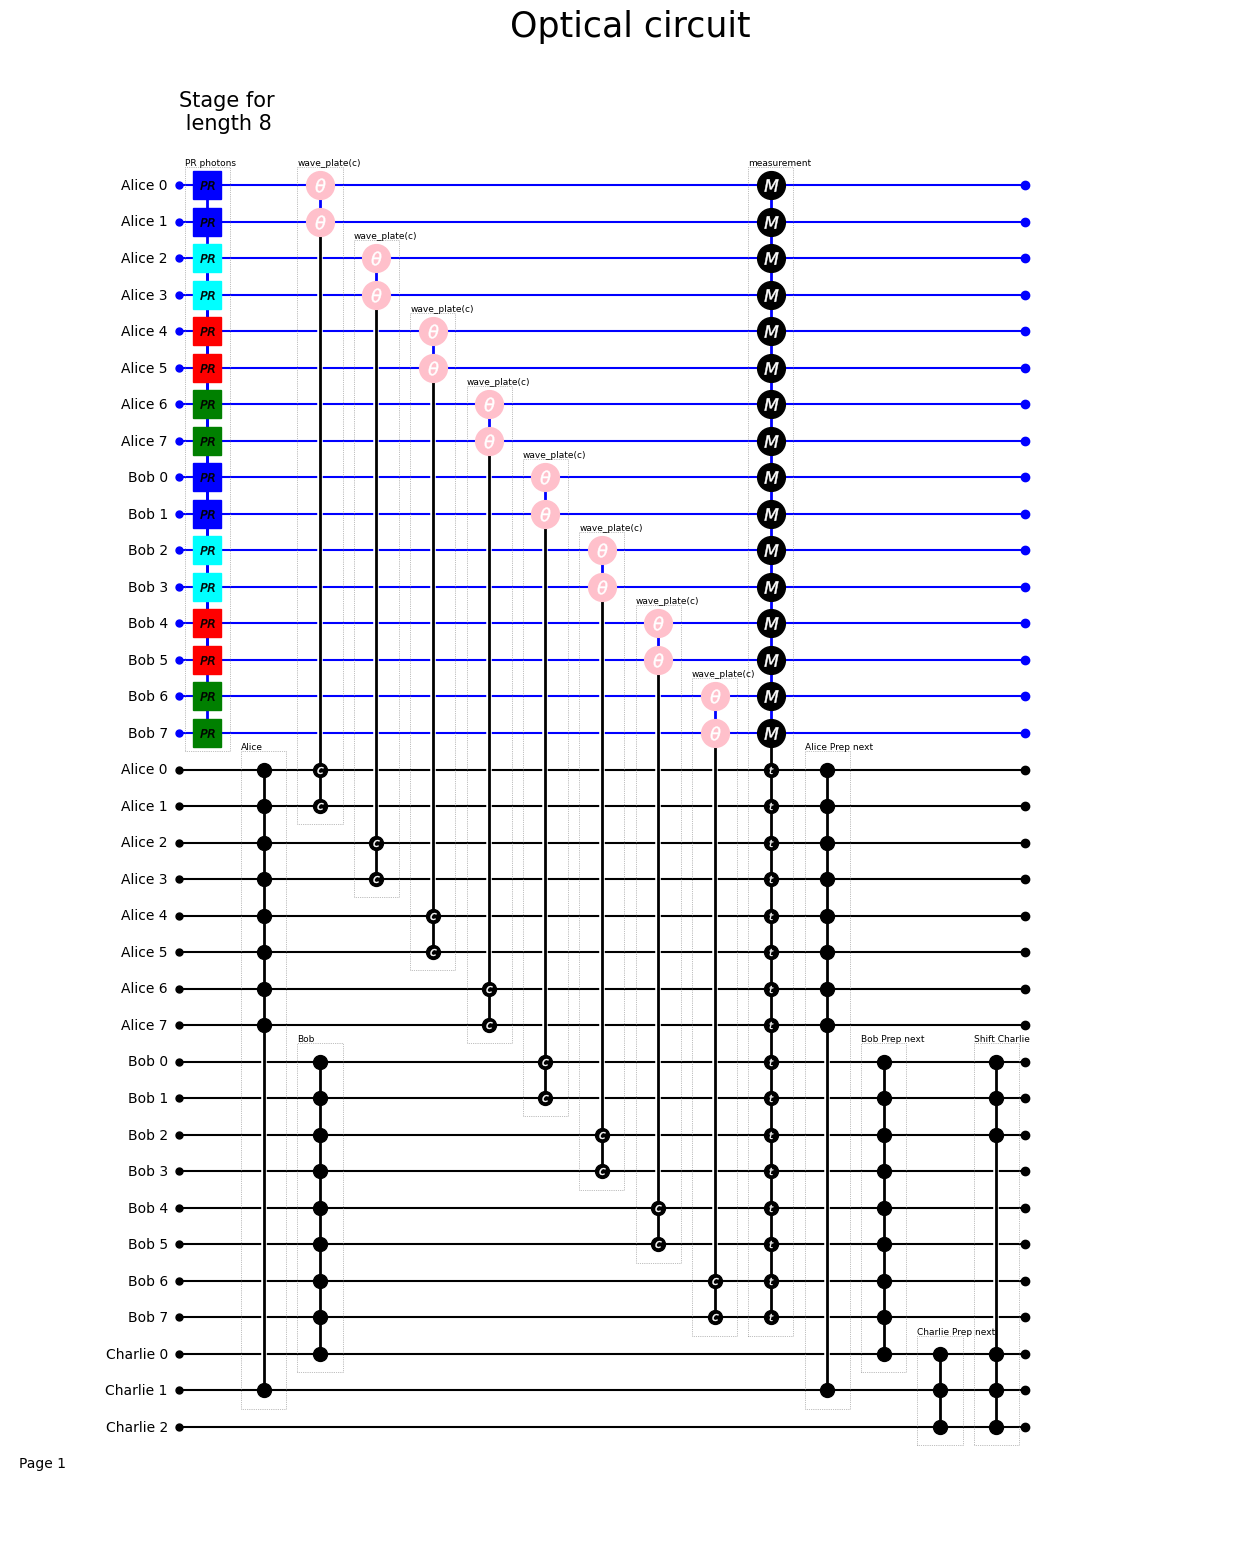

In [37]:
bit_string_length = 8
circuit_draw_settings_dict = {'channel_labels_optical' : ['Alice ' + str(n) for n in range(bit_string_length)] +  ['Bob ' + str(n) for n in range(bit_string_length)],
                              'channel_labels_classical' :  ['Alice ' + str(n) for n in range(bit_string_length)] +  ['Bob ' + str(n) for n in range(bit_string_length)] + ['Charlie ' + str(n) for n in range(3)],
                              'number_of_nodes_on_a_line': 15, 
                              'spacing_between_lines_in_relation_to_spacing_between_nodes' : 1.5
                         }
circuit =   generate_circuit_for_stage_in_guessing_game(length_of_bitstring=bit_string_length,quantumness=1000)
circuit.draw(settings_for_drawing_circuit=circuit_draw_settings_dict)

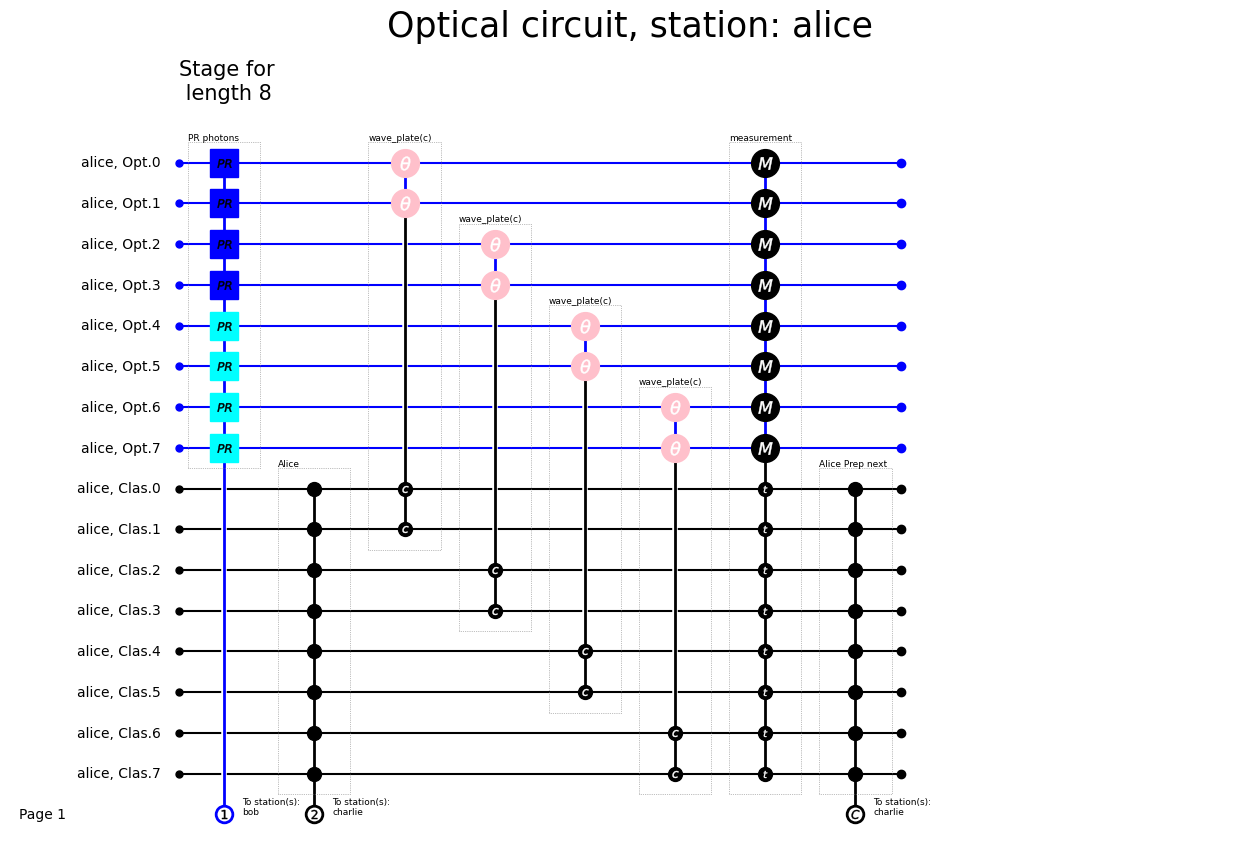

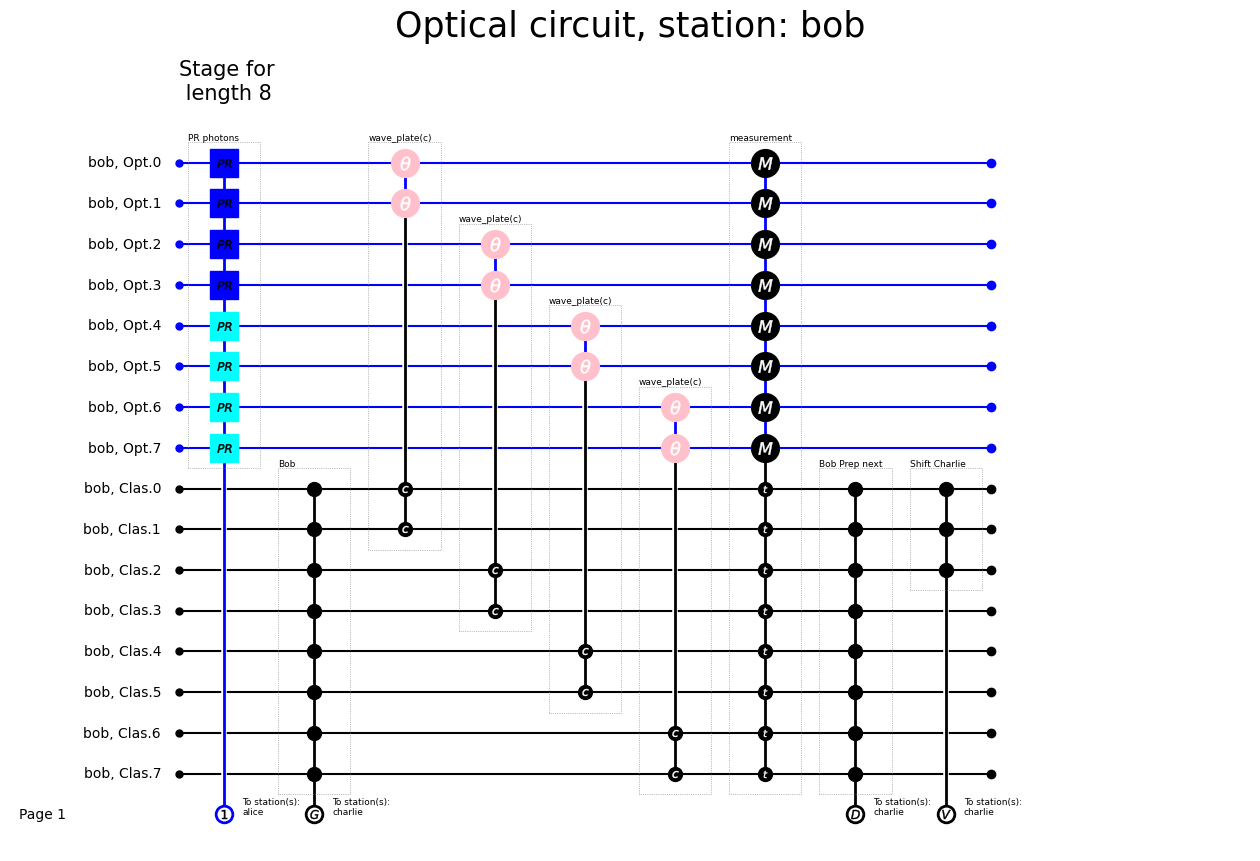

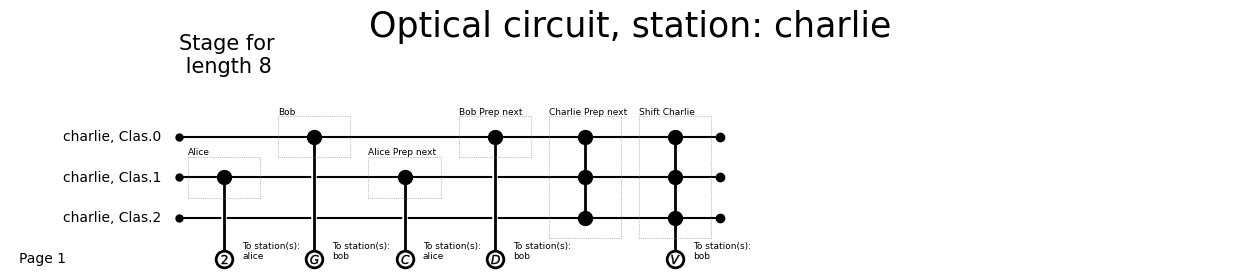

In [38]:
stations = {'station_channels': {   'alice': {'optical_channels': [c for c in range(bit_string_length)], 'classical_channels': [c for c in range(bit_string_length)]},
                                    'bob': {'optical_channels': [c+bit_string_length for c in range(bit_string_length)], 'classical_channels': [c+bit_string_length for c in range(bit_string_length)]},
                                    'charlie': {'optical_channels': [], 'classical_channels': [c+2*bit_string_length for c in range(3)]}}
}
circuit.draw_station(stations=stations)

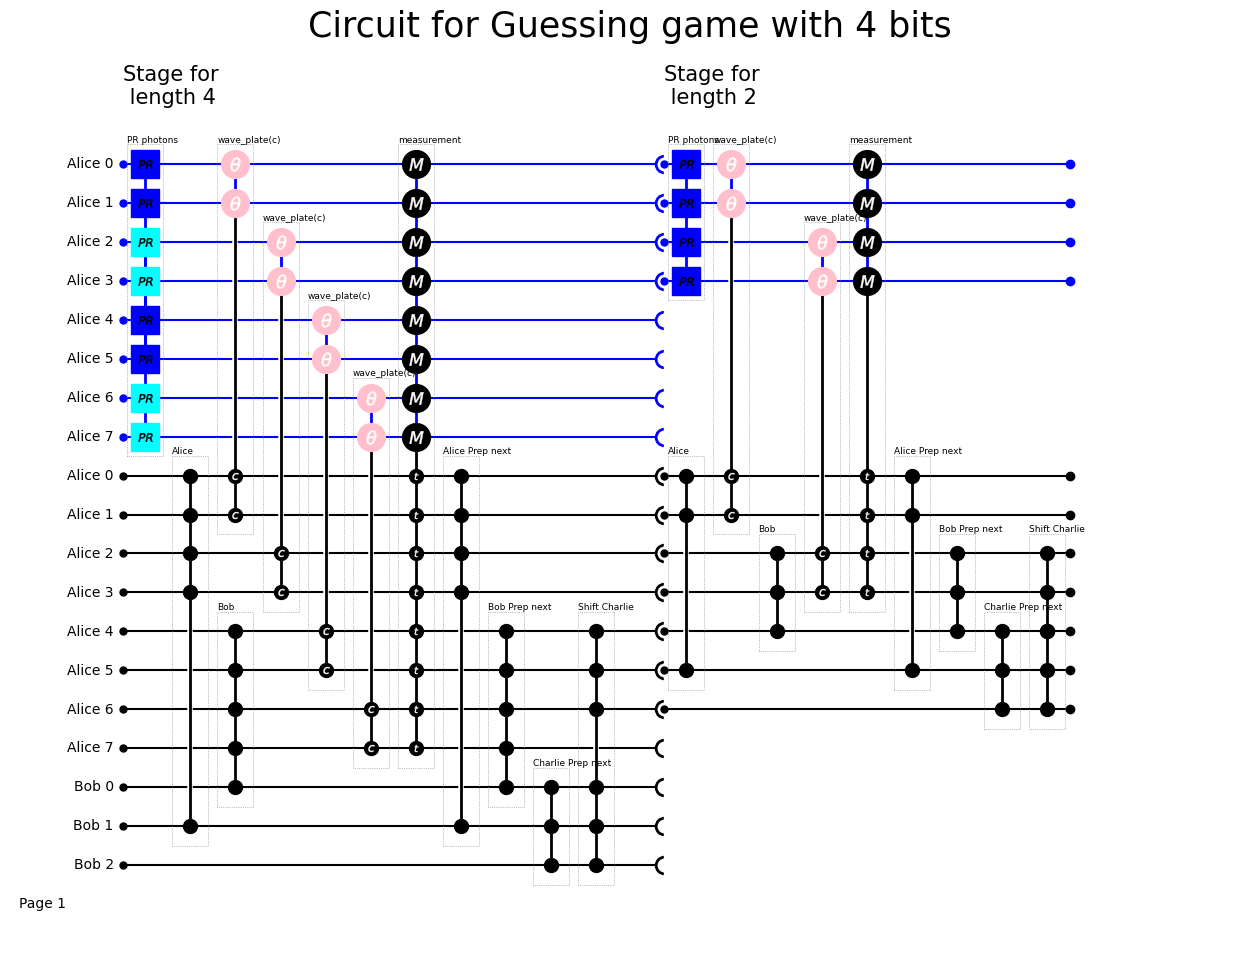

In [39]:
circuit_draw_settings_dict = {'channel_labels_optical' : ['Alice ' + str(n) for n in range(bit_string_length)] +  ['Bob ' + str(n) for n in range(bit_string_length)],
                              'channel_labels_classical' :  ['Alice ' + str(n) for n in range(bit_string_length)] +  ['Bob ' + str(n) for n in range(bit_string_length)] + ['Charlie ' + str(n) for n in range(3)],
                              'number_of_nodes_on_a_line': 21, 
                              'spacing_between_lines_in_relation_to_spacing_between_nodes' : 2,
                              'compound_circuit_title': 'Circuit for Guessing game with 4 bits',
                              'channel_line_length_as_fraction_of_figure_width': 0.9
                         }

bit_string_length = 4


circuit_list = []
bit_string_length_counter = bit_string_length
while bit_string_length_counter > 1:
     circuit =   generate_circuit_for_stage_in_guessing_game(length_of_bitstring=bit_string_length_counter ,quantumness=100000)
     circuit_list.append(circuit)
     bit_string_length_counter = bit_string_length_counter //2

compound_circuit = fsc.CompoundFockStateCircuit(list_of_circuits=circuit_list)

compound_circuit.draw(settings_for_drawing_circuit=circuit_draw_settings_dict)

<a id="test"></a>

## Test circuits

### Test single stage as last stage (so for 2 bit input)
For a single stage with bitstring length 2 we can loop through all combinations. All 2-bit numbers are used, for all number Bob tries to guess both indices and we also use the stored value from a previous stage (0 or 1). Bob should guess '1' for all states with initial_state 'Expected 1' and guess '0' for all states with initial_state 'Expected 0'.

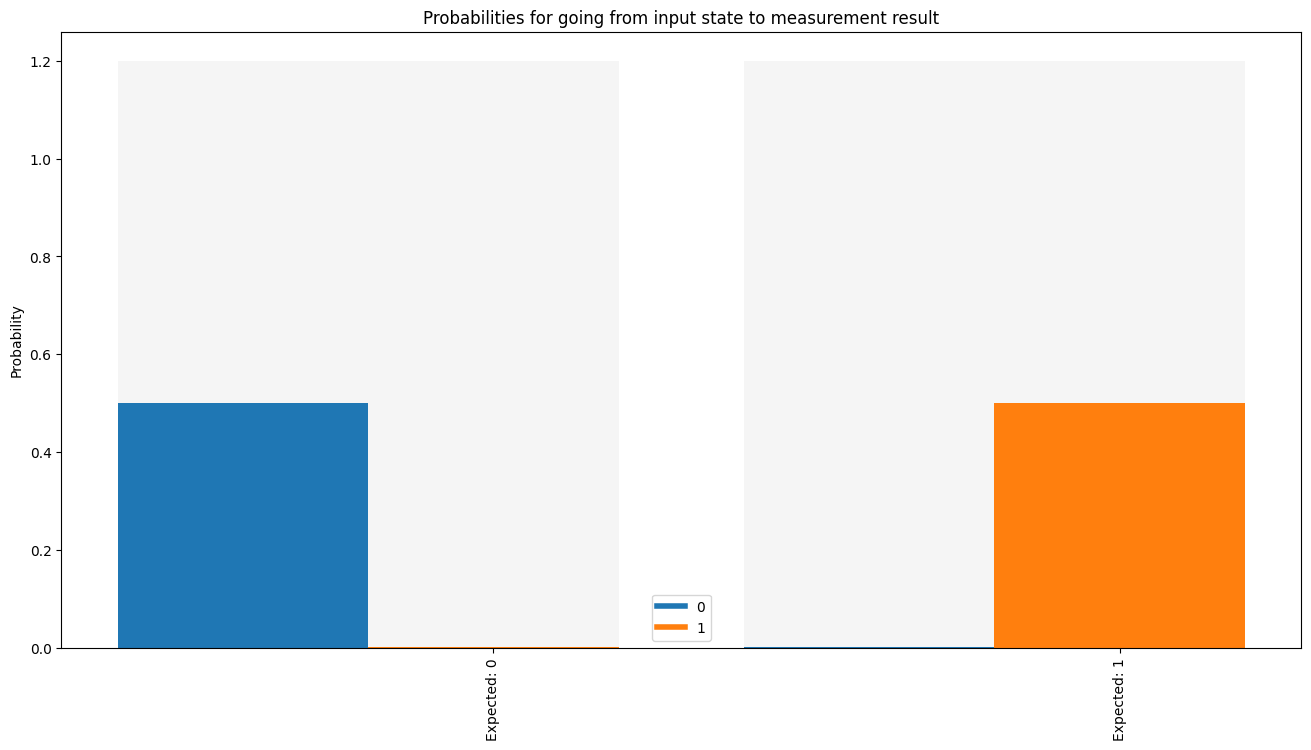

In [40]:
bit_string_length = 2

circuit =   generate_circuit_for_stage_in_guessing_game(length_of_bitstring=bit_string_length,quantumness=1000)

resulting_collection = fsc.CollectionOfStates(fock_state_circuit=circuit, input_collection_as_a_dict=dict([]))

for bobs_index in [0]:#[0,1]:
     for charlies_number in [0,1,2,3]:
          for stored_so_far in [0,1]:
               alices_bit_list = number_to_bit_list(charlies_number,bit_string_length)
               initial_collection = fsc.CollectionOfStates(fock_state_circuit=circuit, input_collection_as_a_dict=dict([]))
               state = fsc.State(initial_collection)
               
               state.classical_channel_values[-3] = bobs_index
               state.classical_channel_values[-2] = charlies_number
               state.classical_channel_values[-1] = stored_so_far
               expected = (alices_bit_list[bobs_index]+stored_so_far)%2
               state.initial_state = "Expected: " + str(expected) 
               # for each initial state we want the cumulative probability to add up to 1. We have 16 states over two initial state,
               # so every state has 12.5% probability
               state.cumulative_probability = 0.125
               initial_collection.add_state(state)

               result = circuit.evaluate_circuit(initial_collection)
               for state_out in result:
                    resulting_collection.add_state(state_out)

resulting_collection.plot(classical_channels=[-1])


### Test two stages with compound circuit with a single collection of states
For two stages we generate random numbers and bit indices to test the success rate. With a high value for quantumness we expect Bob to always guess correctly.

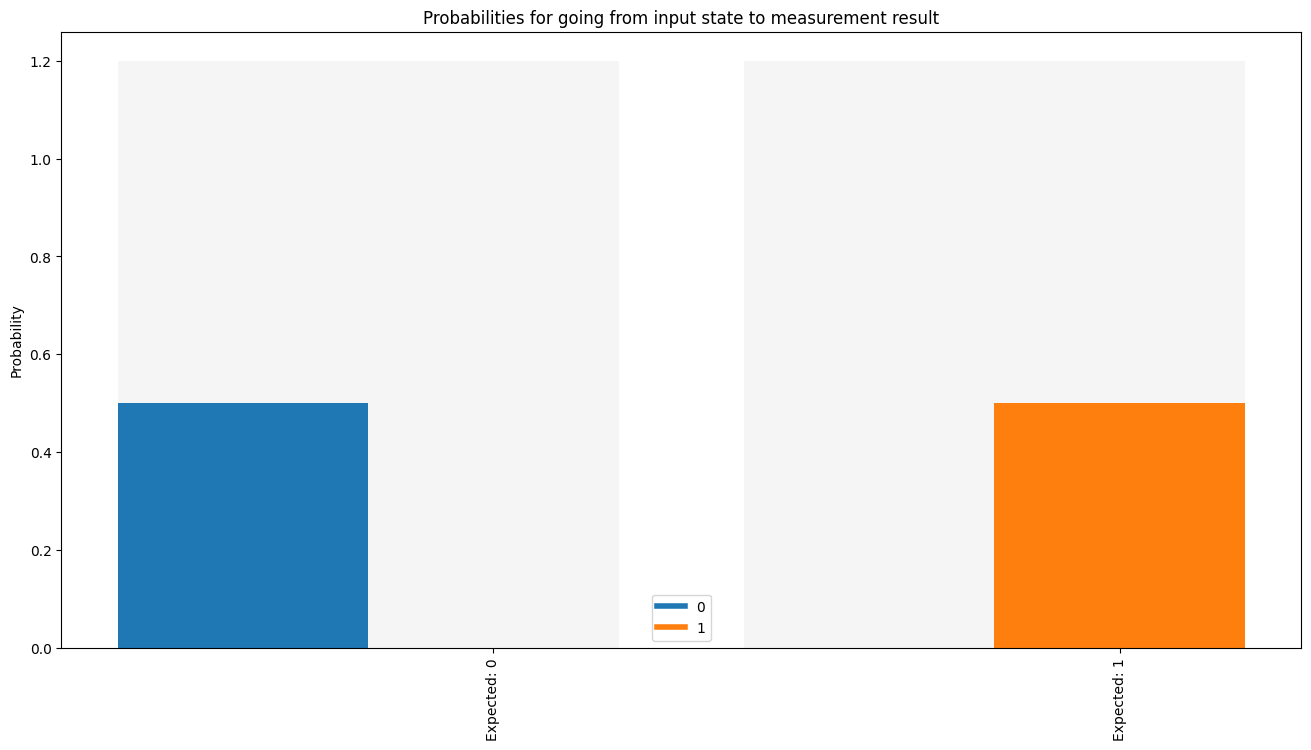

In [41]:
N = 10
bit_string_length = 4


circuit_list = []
bit_string_length_counter = bit_string_length
while bit_string_length_counter > 1:
     circuit =   generate_circuit_for_stage_in_guessing_game(length_of_bitstring=bit_string_length_counter ,quantumness=100000)
     circuit_list.append(circuit)
     bit_string_length_counter = bit_string_length_counter //2

compound_circuit = fsc.CompoundFockStateCircuit(list_of_circuits=circuit_list)

initial_collection = fsc.CollectionOfStates(fock_state_circuit=circuit_list[0], input_collection_as_a_dict=dict([]))

for _ in range(N):
    charlies_number = np.random.randint(0,2**bit_string_length)
    bobs_index = np.random.randint(bit_string_length)     
    alices_bit_list = number_to_bit_list(charlies_number,bit_string_length)
    state = fsc.State(initial_collection)
    state.initial_state = "Expected: " + str(alices_bit_list[bobs_index])
    state.classical_channel_values[-3] = bobs_index
    state.classical_channel_values[-2] = charlies_number
    state.cumulative_probability = 1/N
    initial_collection.add_state(state)

  
resulting_collection = compound_circuit.evaluate_circuit(initial_collection)


resulting_collection.plot(classical_channels = [-1])





### Test with quantumness 1 to find 85% success rate per stage


First we test with single stage for string length 8

In [42]:
N =1
quantumness=1
bit_string_length = 8

circuit =   generate_circuit_for_stage_in_guessing_game(length_of_bitstring=bit_string_length,quantumness=quantumness)

initial_collection = fsc.CollectionOfStates(fock_state_circuit=circuit, input_collection_as_a_dict=dict([]))

for iteration in range(N):
    charlies_number = np.random.randint(0,2**bit_string_length)
    bobs_index = np.random.randint(bit_string_length)     
    alices_bit_list = number_to_bit_list(charlies_number,bit_string_length)
    state = fsc.State(initial_collection)
    state.initial_state = str(iteration) + "Expected: " + str(alices_bit_list[bobs_index])
    state.classical_channel_values[-3] = bobs_index
    state.classical_channel_values[-2] = charlies_number
    state.cumulative_probability = 1
    initial_collection.add_state(state)
  
resulting_collection = circuit.evaluate_circuit(initial_collection)

# to determine success rate we check per state if the last character of the initial_state is '0' or '1' (the initial state
# is the 'Expected: 0' or 'Expected: 1'.). This character we compare to the value in last classical channel (Charlies 3rd channel).
# This channel should contain Bob's guess. If the guess is the same as indicated in the initial_state we add the probability for this
# state to the variable correct, otherwise to the variable fault
fault = 0
correct = 0
for state in resulting_collection:
    bobs_index = state.classical_channel_values[-3]   
    alices_bit_list = number_to_bit_list(state.classical_channel_values[-2],bit_string_length)
    guess = (alices_bit_list[bobs_index] + state.classical_channel_values[-1])%2
    if str(guess) == state.initial_state[-1]:
        correct += state.cumulative_probability
    else:
        fault += state.cumulative_probability

print('For a quantumness value of 1 we expect a success rate of 85% per stage')
print('Result from simulation: ',np.round(correct/(correct+fault),2))




For a quantumness value of 1 we expect a success rate of 85% per stage
Result from simulation:  0.85


We test a single stage for 4 bits with quantumness 1, expect to find 85% success rate

In [43]:
N =10
quantumness=1
bit_string_length = 4

circuit =   generate_circuit_for_stage_in_guessing_game(length_of_bitstring=bit_string_length ,quantumness=quantumness)

initial_collection = fsc.CollectionOfStates(fock_state_circuit=circuit, input_collection_as_a_dict=dict([]))

for iteration in range(N):
    charlies_number = np.random.randint(0,2**bit_string_length)
    bobs_index = np.random.randint(bit_string_length)     
    alices_bit_list = number_to_bit_list(charlies_number,bit_string_length)
    state = fsc.State(initial_collection)
    state.initial_state = str(iteration) + "Expected: " + str(alices_bit_list[bobs_index])
    state.classical_channel_values[-3] = bobs_index
    state.classical_channel_values[-2] = charlies_number
    state.cumulative_probability = 1
    initial_collection.add_state(state)

  
resulting_collection = circuit.evaluate_circuit(initial_collection)

# to determine success rate we check per state if the last character of the initial_state is '0' or '1' (the initial state
# is the 'Expected: 0' or 'Expected: 1'.). This character we compare to the value in last classical channel (Charlies 3rd channel).
# This channel should contain Bob's guess. If the guess is the same as indicated in the initial_state we add the probability for this
# state to the variable correct, otherwise to the variable fault
fault = 0
correct = 0
for state in resulting_collection:
    bobs_index = state.classical_channel_values[-3]   
    alices_bit_list = number_to_bit_list(state.classical_channel_values[-2],bit_string_length)
    guess = (alices_bit_list[bobs_index] + state.classical_channel_values[-1])%2
    if str(guess) == state.initial_state[-1]:
        correct += state.cumulative_probability
    else:
        fault += state.cumulative_probability

print('For a quantumness value of 1 we expect a success rate of 85% per stage')
print('Result from simulation: ',np.round(correct/(correct+fault),2))

For a quantumness value of 1 we expect a success rate of 85% per stage
Result from simulation:  0.85


## Test three stages combined with quantumness 1

In [44]:
quantumness=1
bit_string_length = 8

# first generate the circuit
circuit_list = []
bit_string_length_counter = bit_string_length
while bit_string_length_counter > 1:
    circuit =   generate_circuit_for_stage_in_guessing_game(length_of_bitstring=bit_string_length_counter ,quantumness=quantumness)
    circuit_list.append(circuit)
    bit_string_length_counter = bit_string_length_counter //2
compound_circuit = fsc.CompoundFockStateCircuit(list_of_circuits=circuit_list)

# prepare the input state
initial_collection = fsc.CollectionOfStates(fock_state_circuit=circuit_list[0], input_collection_as_a_dict=dict([]))
charlies_number = np.random.randint(0,2**bit_string_length)
bobs_index = np.random.randint(bit_string_length)     
alices_bit_list = number_to_bit_list(charlies_number,bit_string_length)
state = fsc.State(initial_collection)
state.initial_state = str(iteration) + "Expected: " + str(alices_bit_list[bobs_index])
state.classical_channel_values[-3] = bobs_index
state.classical_channel_values[-2] = charlies_number
state.cumulative_probability = 1
initial_collection.add_state(state)

# run the circuit
resulting_collection = compound_circuit.evaluate_circuit(initial_collection)

# to determine success rate we check per state if the last character of the initial_state is '0' or '1' (the initial state
# is the 'Expected: 0' or 'Expected: 1'.). This character we compare to the value in last classical channel (Charlies 3rd channel).
# This channel should contain Bob's guess. If the guess is the same as indicated in the initial_state we add the probability for this
# state to the variable correct, otherwise to the variable fault
fault = 0
correct = 0
for state in resulting_collection:
    guess = state.classical_channel_values[-1]
    if str(guess) == state.initial_state[-1]:
        correct += state.cumulative_probability
    else:
        fault += state.cumulative_probability

# We can simulate the expected outcome. For each state the success rate should be 85%. We expect the correct answer if all stages deliver
# a correct result or if only one of the stages delivers a correct result (two stages with an incorrect result cancel eachother, so together
# they still come to a correct outcome!)
Psuccess = 0.5+0.5*np.cos(np.pi/4)
Pfail = 1-Psuccess
Ptotal = Psuccess**3 + Psuccess*Pfail*Pfail*3
print("Success rate expected for single stage: ", np.round(Psuccess,2), "Expected in total: ", np.round(Ptotal,2))

# Compare what we expect to what we find
print('For a quantumness value of 1 we expect a success rate of', np.round(Ptotal,2),' for the three stages combined')
print('From the simulation we find a value of: ', np.round(correct/(correct+fault),2))

Success rate expected for single stage:  0.85 Expected in total:  0.68
For a quantumness value of 1 we expect a success rate of 0.68  for the three stages combined
From the simulation we find a value of:  0.68


## Calculate the success rate for different lengths of Alice's bitstring (n) and different amounts of communication (m).

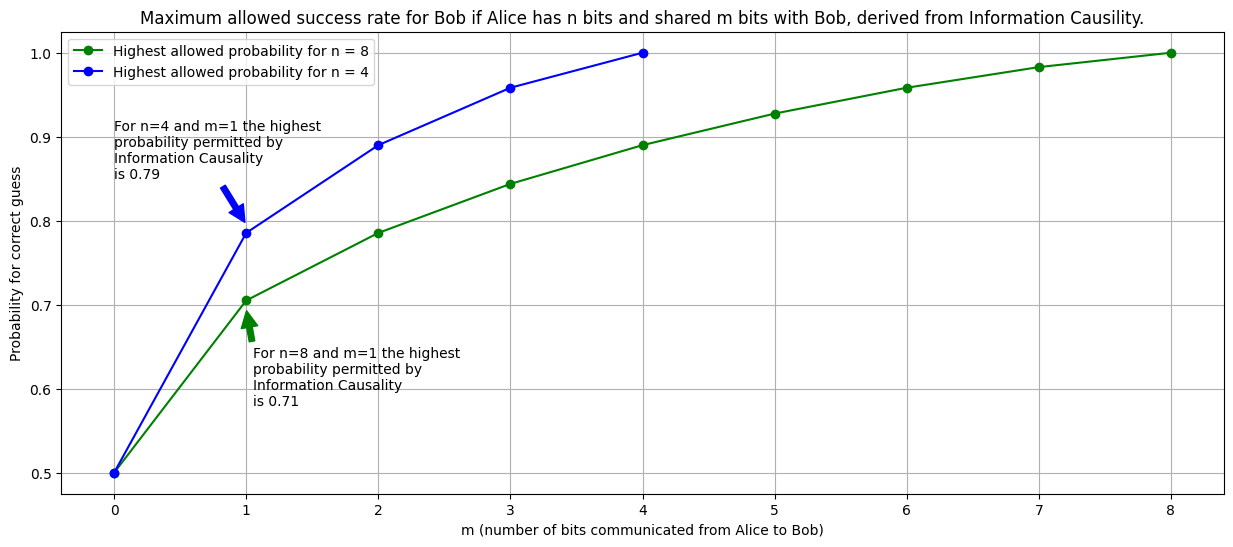

For m = 1 the maximum success rate is  0.785  for n=4, and the maximum success rate is  0.705  for n=8


In [45]:
# Alice has a string of n bits
# She shares m bits with Bob
# Bob has probability p to guess any bit in Alice's bitstring
# so we have I(x:y) = n-nH(p) <= m
# or H(p) > 1 - m/n

# first calculate the probabilities for n = 8
n = 8
probabilities_8 = []
ms_8 = []
for m in range(n+1):
    p = binary_entropy_reverse(1 - m/n)
    probabilities_8.append(p)
    ms_8.append(m)

# first calculate the probabilities for n = 4
n = 4
probabilities_4 = []
ms_4 = []
for m in range(n+1):
    p = binary_entropy_reverse(1 - m/n)
    probabilities_4.append(p)
    ms_4.append(m)

# create the graph
fig, ax = plt.subplots()

ax.plot(ms_8, probabilities_8, label = 'Highest allowed probability for n = 8', linestyle = 'solid', marker = 'o', color='green')
ax.plot(ms_4, probabilities_4, label = 'Highest allowed probability for n = 4', linestyle = 'solid', marker = 'o', color='blue')


ax.set(xlabel='m (number of bits communicated from Alice to Bob)', ylabel='Probability for correct guess',
       title='Maximum allowed success rate for Bob if Alice has n bits and shared m bits with Bob, derived from Information Causility.')

ax.annotate('For n=4 and m=1 the highest \nprobability permitted by \nInformation Causality \nis '+str(np.round(probabilities_4[1],2)), xy=(1,probabilities_4[1]+0.01), xytext=(0,0.85),
            arrowprops=dict(color='blue', shrink=0.05),
            )
ax.annotate('For n=8 and m=1 the highest \nprobability permitted by \nInformation Causality \nis '+str(np.round(probabilities_8[1],2)), xy=(1,probabilities_8[1]-0.01), xytext=(1.05,0.58),
            arrowprops=dict(color='green', shrink=0.05),
            )
ax.grid()
plt.legend()
plt.show()

print("For m = 1 the maximum success rate is ", np.round(probabilities_4[1],3), " for n=4, and the maximum success rate is ", np.round(probabilities_8[1],3), " for n=8")

In [46]:
def calculate_q_from_success_rate(success_rate, bit_string_length):
    power_factor = np.log2(bit_string_length)
    K = 4*np.power((2*(success_rate-(1/2))),1/power_factor)
    q = K_to_quantumness(K)
    return q

print("For n=8 the q-value where the success rate is exactly at the boundary of what Information Causality permits is ", np.round(calculate_q_from_success_rate(0.705,8),2))
print("For n=4 the q-value where the success rate is exactly at the boundary of what Information Causality permits is ",np.round(calculate_q_from_success_rate(0.785,4),2))

For n=8 the q-value where the success rate is exactly at the boundary of what Information Causality permits is  1.17
For n=4 the q-value where the success rate is exactly at the boundary of what Information Causality permits is  1.23


<a id="curves"></a>
## Generate curves for the success rate as a function of quantumness

### Calculate the success rate from the mathematical model (this is what we expect). 
See the Pawlowksy article for the details behind this calculation.

In [47]:
q_values_calculation = [n/10 for n in range(10,200,2)]

bit_string_length = 4

res_cn_4_for_q = []
for q in q_values_calculation:
    K = quantumness_to_K(quantumness=q)
    L = length_of_bitstring(2**(bit_string_length-1))
    success_calculated = (1/2)*(1+(K/4)**np.log2(bit_string_length))
    res_cn_4_for_q.append(success_calculated) 

bit_string_length = 8

res_cn_8_for_q = []
for q in q_values_calculation:
    K = quantumness_to_K(quantumness=q)
    L = length_of_bitstring(2**(bit_string_length-1))
    success_calculated = (1/2)*(1+(K/4)**np.log2(bit_string_length))
    res_cn_8_for_q.append(success_calculated) 
    

### Then use the simulation of Popescu Rohrlich photons to determine the success rate

In [48]:
result_4_bit, result_8_bit  = [],[]

q_values_simulation = list(range(1,5))+[8,11,15,19.8]

for bit_string_length in [4,8]:
    for quantumness in list(range(1,5))+[8,11,15,19.8]:
        N = 1
        circuit_list = []
        bit_string_length_counter = bit_string_length
        while bit_string_length_counter > 1:
            circuit =   generate_circuit_for_stage_in_guessing_game(length_of_bitstring=bit_string_length_counter ,quantumness=quantumness)
            circuit_list.append(circuit)
            bit_string_length_counter = bit_string_length_counter //2

        compound_circuit = fsc.CompoundFockStateCircuit(list_of_circuits=circuit_list)

        initial_collection = fsc.CollectionOfStates(fock_state_circuit=circuit_list[0], input_collection_as_a_dict=dict([]))

        for iteration in range(N):
            charlies_number = np.random.randint(0,2**bit_string_length)
            bobs_index = np.random.randint(bit_string_length)     
            alices_bit_list = number_to_bit_list(charlies_number,bit_string_length)
            state = fsc.State(initial_collection)
            state.initial_state = str(iteration) + "Expected: " + str(alices_bit_list[bobs_index])
            state.classical_channel_values[-3] = bobs_index
            state.classical_channel_values[-2] = charlies_number
            state.cumulative_probability = 1
            initial_collection.add_state(state)

        resulting_collection = compound_circuit.evaluate_circuit(initial_collection)
        histo = resulting_collection.plot(classical_channels = [-1], histo_output_instead_of_plot=True)
        
        success_rate = 0
        for label, outcomes in histo.items():
            for outcome in outcomes:
                if label[-1] == outcome['output_state']:
                    success_rate += outcome['probability']
  
        if bit_string_length == 4:
            result_4_bit.append(success_rate)
        if bit_string_length == 8:
            result_8_bit.append(success_rate)


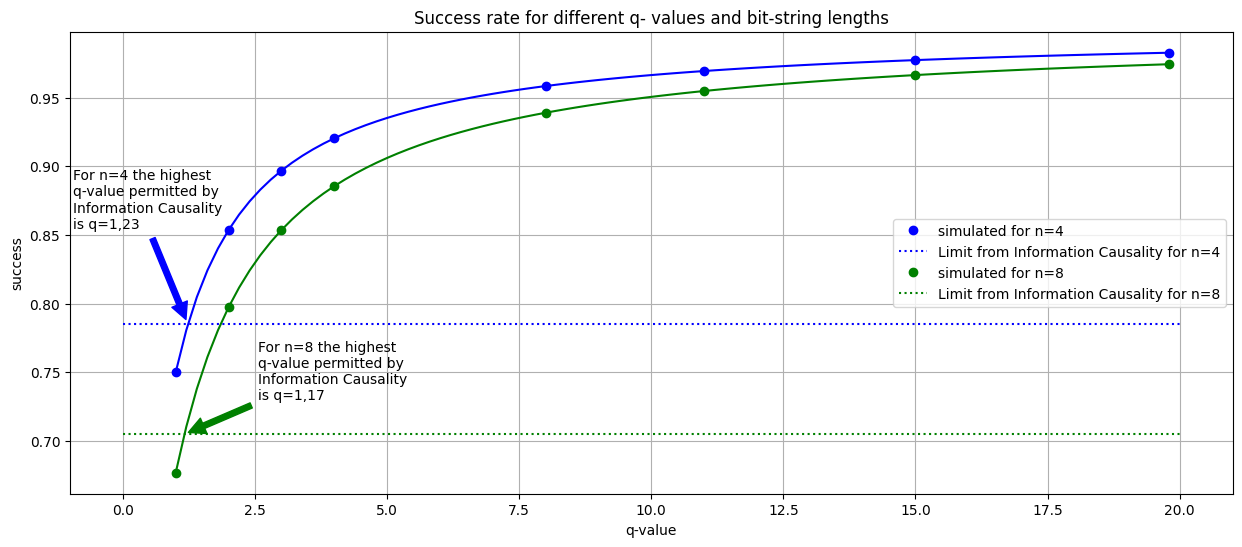

In [49]:
fig, ax = plt.subplots()

ax.plot(q_values_calculation, res_cn_4_for_q, linestyle = 'solid', marker = 'none', color='blue')
ax.plot(q_values_simulation, result_4_bit, label = 'simulated for n=4', linestyle = 'none', marker = 'o', color='blue')
ax.plot([0,20], [0.785,0.785], label = 'Limit from Information Causality for n=4', linestyle = 'dotted', marker = 'none', color='blue')
ax.plot(q_values_calculation, res_cn_8_for_q, linestyle = 'solid', marker = 'none', color='green')
ax.plot(q_values_simulation, result_8_bit, label = 'simulated for n=8', linestyle = 'none', marker = 'o', color='green')
ax.plot([0,20], [0.705,0.705], label =  'Limit from Information Causality for n=8', linestyle = 'dotted', marker = 'none', color='green')


ax.set(xlabel='q-value', ylabel='success',
       title='Success rate for different q- values and bit-string lengths')

ax.annotate('For n=4 the highest \nq-value permitted by \nInformation Causality \nis q=1,23', xy=(1.23,0.785), xytext=(-0.95,0.855),
            arrowprops=dict(color='blue', shrink=0.05),
            )
ax.annotate('For n=8 the highest \nq-value permitted by \nInformation Causality \nis q=1,17', xy=(1.17,0.705), xytext=(2.55,0.73),
            arrowprops=dict(color='green', shrink=0.05),
            )

ax.grid()
plt.legend()
plt.show()

In [50]:
fsc.about()


FockStateCircuit: Quantum Optics with Fock States for Python
Copyright (c) 2023 and later.
Rob Hendriks

FockStateCircuit:            1.0.5
CollectionOfStates:          1.0.1
State:                       1.0.1
ColumnOfStates:              1.0.0
InterferenceGroup:           1.0.0
CollectionOfStateColumns:    1.0.0
OpticalNodes:                1.0.0
BridgeNodes:                 1.0.0
CustomNodes:                 1.0.0
ControlledNodes:             1.0.0
MeasurementNodes:            1.0.0
ClassicalNodes:              1.0.0
SpectralNodes:               1.0.0
QuantumOperatorNodes:        1.0.0
temporal_functions:          1.0.0
Numpy Version:               1.26.4
Matplotlib version:          3.8.4
